<a href="https://colab.research.google.com/github/nguyenanhtienabcd/AIO2024_EXERCISE/blob/feature%2FMODULE3-WEEK4/m03w04_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split


In [44]:
# https://drive.google.com/file/d/1qeJqFtRdjjHqExbWJcgKy0yJbczTTAE3/view?usp=sharing
!gdown 1qeJqFtRdjjHqExbWJcgKy0yJbczTTAE3

Downloading...
From: https://drive.google.com/uc?id=1qeJqFtRdjjHqExbWJcgKy0yJbczTTAE3
To: /content/Housing.csv
100% 30.0k/30.0k [00:00<00:00, 56.6MB/s]


In [45]:
# read file
df = pd.read_csv('/content/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [46]:
# convert string to number
categorical_cols = df.select_dtypes(include = 'object').columns. tolist()
categorical_cols


['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [47]:
ordinal_encoder = OrdinalEncoder()
encoder_ordinal_encoder = ordinal_encoder.fit_transform(df[categorical_cols])
encoder_categorical_df = pd.DataFrame(encoder_ordinal_encoder, columns = categorical_cols)
encoder_categorical_df

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,1.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
540,1.0,0.0,1.0,0.0,0.0,0.0,2.0
541,0.0,0.0,0.0,0.0,0.0,0.0,1.0
542,1.0,0.0,0.0,0.0,0.0,0.0,2.0
543,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
numerial_df = df.drop(categorical_cols, axis = 1)
numerial_df

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [49]:
encoded_df = pd.concat([numerial_df, encoder_categorical_df], axis = 1)
encoded_df

,price,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,13300000,7420,4,2,3,2,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,12250000,8960,4,4,4,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12250000,9960,3,2,2,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0
3,12215000,7500,4,2,2,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,11410000,7420,4,1,2,2,1.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1.0,0.0,1.0,0.0,0.0,0.0,2.0
541,1767150,2400,3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
542,1750000,3620,2,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
543,1750000,2910,3,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# chuẩn hóa dữ liệu cần thực hiện
normalizer = StandardScaler()
normalization_df = normalizer.fit_transform(encoded_df)
normalization_df

array([[ 4.56636513,  1.04672629,  1.40341936, ...,  1.4726183 ,
         1.80494113, -1.40628573],
       [ 4.00448405,  1.75700953,  1.40341936, ...,  1.4726183 ,
        -0.55403469, -1.40628573],
       [ 4.00448405,  2.21823241,  0.04727831, ..., -0.67906259,
         1.80494113, -0.09166185],
       ...,
       [-1.61432675, -0.70592066, -1.30886273, ..., -0.67906259,
        -0.55403469,  1.22296203],
       [-1.61432675, -1.03338891,  0.04727831, ..., -0.67906259,
        -0.55403469, -1.40628573],
       [-1.61432675, -0.5998394 ,  0.04727831, ..., -0.67906259,
        -0.55403469,  1.22296203]])

In [51]:
# tách dự liệu nhãn và dữ liệu đầu vào
X = normalization_df[:, 1:]
y = normalization_df[:,0]

In [52]:
X

array([[ 1.04672629,  1.40341936,  1.42181174, ...,  1.4726183 ,
         1.80494113, -1.40628573],
       [ 1.75700953,  1.40341936,  5.40580863, ...,  1.4726183 ,
        -0.55403469, -1.40628573],
       [ 2.21823241,  0.04727831,  1.42181174, ..., -0.67906259,
         1.80494113, -0.09166185],
       ...,
       [-0.70592066, -1.30886273, -0.57018671, ..., -0.67906259,
        -0.55403469,  1.22296203],
       [-1.03338891,  0.04727831, -0.57018671, ..., -0.67906259,
        -0.55403469, -1.40628573],
       [-0.5998394 ,  0.04727831, -0.57018671, ..., -0.67906259,
        -0.55403469,  1.22296203]])

In [53]:
y

array([ 4.56636513e+00,  4.00448405e+00,  4.00448405e+00,  3.98575468e+00,
        3.55497918e+00,  3.25530927e+00,  2.88072189e+00,  2.88072189e+00,
        2.73088693e+00,  2.69342819e+00,  2.69342819e+00,  2.62974834e+00,
        2.43121702e+00,  2.39375829e+00,  2.39375829e+00,  2.31884081e+00,
        2.31884081e+00,  2.24392333e+00,  2.20646459e+00,  2.18773522e+00,
        2.13154711e+00,  2.09408838e+00,  2.07535901e+00,  2.07535901e+00,
        2.03790027e+00,  2.01917090e+00,  1.97796629e+00,  1.94425342e+00,
        1.94425342e+00,  1.94425342e+00,  1.94425342e+00,  1.94425342e+00,
        1.88806531e+00,  1.83187721e+00,  1.79441847e+00,  1.77351649e+00,
        1.75321385e+00,  1.71950099e+00,  1.71013630e+00,  1.68204225e+00,
        1.66331288e+00,  1.64458351e+00,  1.56966604e+00,  1.56966604e+00,
        1.49474856e+00,  1.49474856e+00,  1.47601919e+00,  1.45728982e+00,
        1.43856045e+00,  1.41983108e+00,  1.41983108e+00,  1.41983108e+00,
        1.38237234e+00,  

In [54]:
# chia dữ liệu
data_val_size = 0.3
random_state = 1
is_shuffle = True
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size = data_val_size,
    random_state = random_state,
    shuffle = is_shuffle
    )

In [61]:
# huấn luyện mô hình với random forest
regressor = RandomForestRegressor(random_state=random_state)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [56]:
# huấn luyện mô hình với adaboost
from sklearn.ensemble import AdaBoostRegressor
adaboost_regressor = AdaBoostRegressor()
adaboost_regressor.fit(X_train, y_train)

AdaBoostRegressor()

In [57]:
# huấn luyện mô hình với gradient adaboost
from sklearn.ensemble import GradientBoostingRegressor
gradient_regressor = GradientBoostingRegressor()
gradient_regressor.fit(X_train, y_train)

GradientBoostingRegressor()

In [67]:
pred_random_y = regressor.predict(X_val)
pred_adaboost_y = adaboost_regressor.predict(X_val)
pred_gradientboost_y = gradient_regressor.predict(X_val)

In [68]:
# đánh giá mô hình
print("MSE")
print("Random forest: ",mean_squared_error(y_val, pred_random_y))
print("Adaboosting: ",mean_squared_error(y_val, pred_adaboost_y))
print("gradient boosting: ",mean_squared_error(y_val, pred_gradientboost_y))

MSE
Random forest:  0.37944418523089524
Adaboosting:  0.562039042114139
gradient boosting:  0.39883396783417635


In [69]:
print("MAE")
print("Random forest: ",mean_absolute_error(y_val, pred_random_y))
print("Adaboosting: ",mean_absolute_error(y_val, pred_adaboost_y))
print("gradient boosting: ",mean_absolute_error(y_val, pred_gradientboost_y))

MAE
Random forest:  0.46093873321571177
Adaboosting:  0.5660785930904567
gradient boosting:  0.4539078365047495


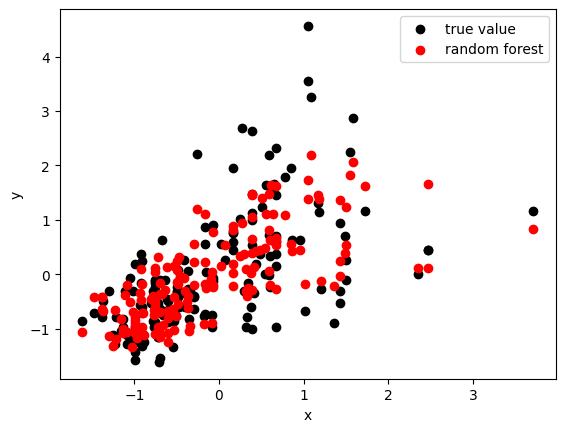

In [70]:
# quan sát qua scatter của random forest
plt.figure()
plt.scatter(X_val[:,0], y_val, color = 'black', label = 'true value')
plt.scatter(X_val[:,0], pred_random_y, color = 'red', label = 'random forest')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


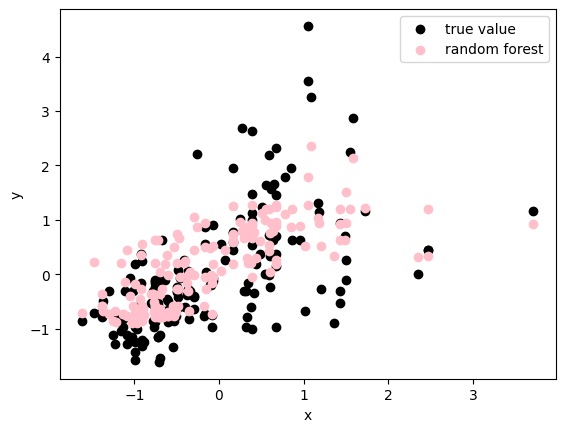

In [73]:
# quan sát qua scatter của adaboosting
plt.figure()
plt.scatter(X_val[:,0], y_val, color = 'black', label = 'true value')
plt.scatter(X_val[:,0], pred_adaboost_y, color = 'pink', label = 'random forest')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

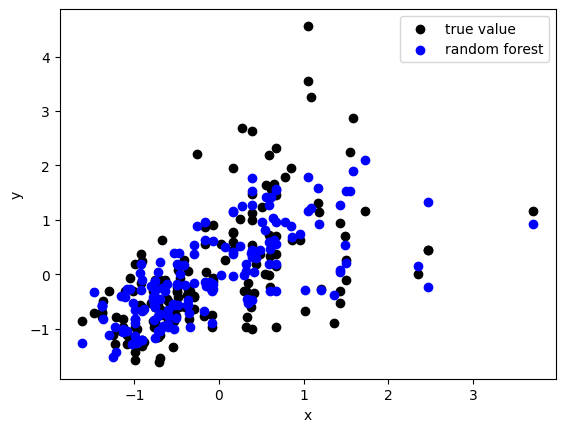

In [72]:
# quan sát qua scatter của Gradientboosting
plt.figure()
plt.scatter(X_val[:,0], y_val, color = 'black', label = 'true value')
plt.scatter(X_val[:,0],pred_gradientboost_y, color = 'blue', label = 'random forest')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()